$\newcommand{\vct}[1]{\overrightarrow{#1}}$
$\newcommand{\pd}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\wfint}[5]{\int _{#1}^{#2} \Psi _{#3}^* {#5} \Psi _{#4} dx}$
$\newcommand{\comp}{\mathbb{C}}$
$\newcommand{\fn}[3]{{#1}: {#2} \rightarrow {#3}}$
$\newcommand{\matrix}[1]{\begin{bmatrix}{#1}\end{bmatrix}}$
$\newcommand{\avg}[1]{\langle {#1} \rangle}$
**Reševanje nelinearnih enačb**

Za polinome stopnje pet ali več ni analitičnih rešitev, moramo "ugibati".

Primer: Tračnica dolžine $l$ se zaradi temperaturne razlike raztegne za $\Delta l$, pri tem se usloči. Predvidevamo, da se usloči v obliki krožnega loka. Zanima nas, za koliko se dvigne sredina tračnice.

Lahko dobimo enačbo, ki pa ne bo rešljiva na roke.
$$\frac{l + \Delta l}{2} = R \varphi$$
$$\sin \varphi = \frac{l}{2 R}$$
Sledi:
$$\frac{l + \Delta l}{2} = \frac{l}{2\sin\varphi}\varphi$$
$$\left(1 + \frac{\Delta l}{l}\right)\sin\varphi - \varphi = 0$$

Zanima nas sicer x, ki pa ga bomo izrazili iz $\varphi$, npr. kot $\displaystyle{x = \frac{l}{2\sin\varphi}(1 - \cos \varphi)}$.
$\\$ Dobili smo tako imenovano transcendenčno enačbo, ki ni rešljiva v zaključeni obliki, tj. ne obstaja formula za $x$, lahko ga le aproksimiramo z vrstami in podobnim.

Numerično lahko take ničle iščemoo na več načinov, najočitnejši je bisekcija. Če je $\fn{f}{[a, b]}{\mathbb{R}}$ zvezna in je $f(a) \cdot f(b) < 0$, mora biti na tem intervalu vsaj ena ničla. Razpolovimo interval in pogledamo, na kateri strani se nahaja ničla. Leva in desna stran obravnavanega intervala bosta konvergirali proti točki, v kateri je $f(x) = 0$. Ničli se lahko poljubno približamo, lahko npr. zahtevamo, da je $|b-a|\lt\varepsilon$

Število potrebnih ponovitev:
$$\frac{b-a}{2^k} \leq \varepsilon$$
$$k \gt \log _2 \frac{|b-a|}{\varepsilon}$$

Če je $|b-a| = 1$ in $\varepsilon = 10^{-10}$, je $k \approx 30$. Da se hitreje, je pa ta metoda enostavna in zanesljiva. Njena slabost pa je, da se jo zelo težko posploši na sisteme linearnih enačb (tj. če imamo dve nelinearni enačbi z dvema neznankama).

Mimogrede: $\displaystyle{c = a - \frac{b-a}{2}}$ se izkaže za boljšo formulo razpolovišča kot $\displaystyle{c = \frac{a + b}{2}}$. Iz nekega razloga ima manjšo računsko napako.

Drugi način: Iteracija z začetnim približkom $x_0$
$$f(x = 0) ~\text{preoblikujemo v } x = g(x)$$
$$x_{r+1} = g(x_r)$$
Če to konvergira, konvergira proti ničli od $f$.
Primeri izbir za $g$:
$$g(x) = x - f(x)$$
$$g(x) = x - Cf(x),~c\neq 0$$
$$g(x) = x - h(h)g(x),~h\neq 0$$

Primer:
$$p(x) = x^3 - 5x^2 + 1$$
$$x = \frac{x^3 + 1}{5}$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x = np.arange(-2.75, 2.75, 0.01)
def p(x):
    return x ** 3 - 5 * x + 1

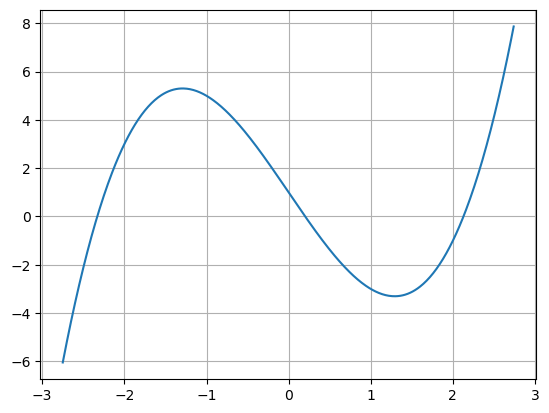

In [29]:
plt.plot(x, p(x))
plt.grid()

Vzamemo začetni približek $x_0 = 2$

In [3]:
x = 2
def g(x): return (x ** 3 + 1) / 5
for _ in range(10):
    x = g(x)
    print(x)

1.8
1.3664
0.7102271397888
0.27165092268126223
0.2040092537964148
0.20169816387407655
0.2016411029636626
0.2016397105413703
0.20163967657279377
0.2016396757441256


Zaporedje konvergira proti neki ničli, vendar je bil naš začetni približek bližje ničli pri $x = 2.2$.

Dokažemo lahko, da zaporedje $x_{r+1} = g(x_r)$ konvergira k neki $\alpha$, če je $g$ skrčitev na intervalu $[\alpha - \delta, \alpha + \delta]$ (tj. če je $|g(x_1) - g(x_2)| \leq m|x_1 - x_2|,~m\in[0, 1)$). Poleg tega velja:
$$|x_r - \alpha| \leq m^r |x_0 - \alpha|$$
$$|x_{r+1} - \alpha| \leq \frac{m}{1-m}|x_r - x_{r-1}|$$
Problem: Če je $m \approx 1$, dobimo zelo slabo oceno.

In [37]:
x = 2.15
def g(x): return (x ** 3 + 1) / 5
for _ in range(10):
    x = g(x)
    print(x)

2.1876749999999996
2.294008340977633
2.6144319732123416
3.774061604220126
10.95120023354713
262.87283106655957
3633014.4627461606
9.590281961429148e+18
1.7641037513160762e+56
1.0980000657263335e+168


To je pa še slabše.

Lagrangeov izrek: $$\left|g(x) - g(y)\right| = \left|g'(\xi)\right||x-y|$$

Ker mora biti to manjše ali enako $m \in [0, 1)$, dobimo zahtevo $g'(\xi) \lt 1$

Če bo torej odvod v ničli $g'(\alpha) \lt 0$, bo zaporedje lahko konvergiralo proti njej, če pa je $g'(\alpha) \geq 1$, pa ne bo konvergiralo proti tej ničli. Očitno je v  našem primeru $x_1=0.2$ tako imenovana "privlačna" ničla, $x_2 = 2.2$ pa odbojna.

Če je $g$ v okolici negibne točke (ničle) $a$ p-krat zvezno odvedljiva in je $g^{(k)}(\alpha) = 0$ za $k = 1, 2, ... p - 1$ ter $g^{(p)}(\alpha) \neq 0$, ima iterativna metoda $x_{r+1} = g(x_r)$ v bližini rešitve $\alpha$ red konvergence $p$. To pomeni:
- $p=1$: Vsaka nova iteracija nam da konstantno število novih točnih decimalk.
- $p=2$: Vsaka nova iteracija nam podvoji število točnih decimalk.
- $p=3$: Vsaka nova iteracija nam potroji število točnih decimalk.

Iteracija za $\sqrt{a}$, $a \gt 0$: $$g(x) = \frac{x^2 + a}{2x}$$
Ta metoda ima kvadratično konvergenco in dokazano deluje.

In [43]:
a = 10
x = 3
def g(x):
    return (x ** 2 + a) / 2 / x
for _ in range(4):
    x = g(x)
    print(x)

3.1666666666666665
3.162280701754386
3.162277660169842
3.1622776601683795


In [44]:
print(np.sqrt(10))

3.1622776601683795


V štirih iteracijah smo torej dobili iskani rezultat.

In [47]:
a = 273.16
x = 20
for _ in range(4):
    x = g(x)
    print(x)
print(np.sqrt(273.16))

16.829
16.530252569968507
16.527552973378178
16.527552752903258
16.527552752903258


In [49]:
a = 45438475.173460
x = 1000
for _ in range(7):
    x = g(x)
    print(x)
print(np.sqrt(45438475.173460))

23219.23758673
12588.084925246707
8098.863269096006
6854.669460135583
6741.752400950002
6740.8067816586945
6740.80671533163
6740.80671533163


Ker imamo opravka s kvadratno konvergenco, naša iteracija zelo hitro knovergira.

Lahko stvar pospešimo, in sicer tako, da vzamemo $g_1 = g(g(x))$. Kako preverimo, da je $\sqrt{a}$ negibna točka funkcije $g(g(x))$?
$$g_1(\sqrt{a}) = g(g(\sqrt{a})) = g(\sqrt{a})$$

Red konvergence:
$$g_1'(x) = g'(g(x))g'(x)$$
$$g_1'(\sqrt{a}) = \left[g'(sqrt{a})\right]^2$$
Ker je $g(\sqrt{a})$ reda (vsaj) 2, je $g_1'(a) = g(\sqrt{a}) = 0$
$$g_1''(x) = g''(g(x))g'(x)g'(x) + g'(g(x))g''(x)$$
$$g_1''(\sqrt{a}) = 0 + 0 = 0$$

To lahko počnemo še naprej, vendar pri četrtem odvodu dobimo neničeln člen.

Konvergenca je odvisna tudi od začetnega pogoja. $g$ mora biti namreč skrčitev, torej mora biti $x_0$ na območju, na katerem je odvod manjši od 1. $\\$
Primer: $g(x) = x^3 - 2x^3 - 2x + 6$
$$g'(x) = 3x^2 - 4x - 2$$
$$|3x^2 - 4x - 2| \lt 1$$

Za oba primera poiščemo ničle:
$$3x^2 - 4x - 3 \lt 0$$
$$x_{1, 2} = \frac{4 \pm \sqrt{16 + 36}}{6} = \frac{2\pm\sqrt{13}}{3}$$

$$3x^2 - 4x - 1 \lt 0$$
$$x_{3, 4} = \frac{4 \pm \sqrt{16 + 12}}{6} = \frac{2 \pm \sqrt{7}}{3}$$

Pogledamo, na katerih intervalih ima funkcija željeni predznak in dobimo, da konvergira za
$$x \in \left(\frac{2 + \sqrt{7}}{3}, \frac{2+\sqrt{13}}{3}\right)$$